In [5]:
from models import *
from initializers import *
import models
import importlib
importlib.reload(models)

def train_momentum(model, epoch_counts, learning_rates, lambdas, report_interval=100, batch_size=None, save_till_best=False):
    for i in range(len(epoch_counts)):
        model.train(epochs=epoch_counts[i],
                    learning_rate=learning_rates[i],
                    batch=True,
                    optimizer="momentum",
                    momentum_lambda=lambdas[i],
                    report_interval=report_interval,
                    batch_size=batch_size,
                    save_till_best=save_till_best)
    model.plot()

def train_rmsprop(model, epoch_counts, learning_rates, rms_beta, report_interval=100, batch_size=None, save_till_best=False):
    for i in range(len(epoch_counts)):
        model.train(epochs=epoch_counts[i],
                    learning_rate=learning_rates[i],
                    batch=True,
                    optimizer="rmsprop",
                    rms_beta=rms_beta,
                    report_interval=report_interval,
                    batch_size=batch_size,
                    save_till_best=save_till_best)
    model.plot()

## SGD with momentum

Model age: 10	MSE on train set: 343.63	MSE on test set: 361.17
Model age: 20	MSE on train set: 324.25	MSE on test set: 329.71
Model age: 30	MSE on train set: 94.06	MSE on test set: 96.52
Model age: 40	MSE on train set: 48.34	MSE on test set: 45.26
--------------------
Reverting to best model at age 39
Best model MSE: 28.79
--------------------
Model age: 49	MSE on train set: 146.83	MSE on test set: 143.17
Model age: 59	MSE on train set: 27.24	MSE on test set: 21.79
Model age: 69	MSE on train set: 12.1	MSE on test set: 6.7
Model age: 79	MSE on train set: 10.79	MSE on test set: 5.71
Model age: 89	MSE on train set: 11.07	MSE on test set: 6.05
--------------------
Reverting to best model at age 85
Best model MSE: 3.98
--------------------
Model age: 95	MSE on train set: 8.95	MSE on test set: 4.11
Model age: 105	MSE on train set: 8.74	MSE on test set: 3.94
Model age: 115	MSE on train set: 8.44	MSE on test set: 3.83
Model age: 125	MSE on train set: 33.19	MSE on test set: 33.2
Model age: 135	

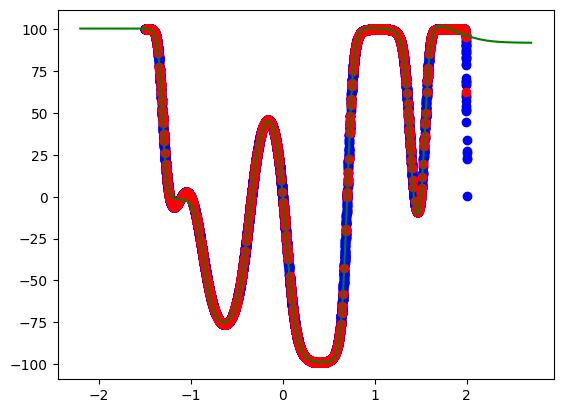

In [6]:
dataset_name = "multimodal-large"
arch = MLPArchitecture(1, [25, 25], 1)
model_momentum = MLP(architecture=arch, dataset_name=dataset_name, initializer=XavierNormalInitializer())

epoch_counts = [40, 50, 50, 50]
learning_rates = [0.1, 0.1, 0.1, 0.1]
lambdas = [0.1, 0.3, 0.6, 0.8]

train_momentum(model_momentum, epoch_counts, learning_rates, lambdas, report_interval=10, batch_size=1, save_till_best=True)

### final evaluation

In [7]:
model_momentum.evaluate()

MSE on train set: 7.9	MSE on test set: 3.17


## Mini-batch with RMSProp

Model age: 10	MSE on train set: 907.72	MSE on test set: 933.59
Model age: 20	MSE on train set: 443.09	MSE on test set: 478.49
Model age: 30	MSE on train set: 590.36	MSE on test set: 605.06
Model age: 40	MSE on train set: 394.56	MSE on test set: 418.35
Model age: 50	MSE on train set: 435.93	MSE on test set: 455.03
Model age: 60	MSE on train set: 871.01	MSE on test set: 929.86
Model age: 70	MSE on train set: 858.87	MSE on test set: 879.9
Model age: 80	MSE on train set: 340.54	MSE on test set: 382.42
Model age: 90	MSE on train set: 500.87	MSE on test set: 534.61
Model age: 100	MSE on train set: 334.53	MSE on test set: 364.08
Model age: 110	MSE on train set: 311.47	MSE on test set: 341.58
Model age: 120	MSE on train set: 517.9	MSE on test set: 567.47
Model age: 130	MSE on train set: 353.01	MSE on test set: 380.37
Model age: 140	MSE on train set: 336.49	MSE on test set: 366.57
Model age: 150	MSE on train set: 461.18	MSE on test set: 485.8
Model age: 160	MSE on train set: 505.11	MSE on test 

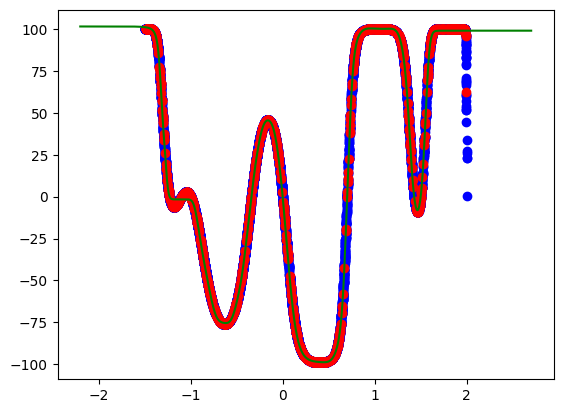

In [10]:
dataset_name = "multimodal-large"
arch = MLPArchitecture(1, [25, 25], 1)
model_rmsprop = MLP(architecture=arch, dataset_name=dataset_name, initializer=XavierUniformInitializer())

epoch_counts = [400, 500, 500, 500]
learning_rates = [0.1, 0.05, 0.01, 0.01]

train_rmsprop(model=model_rmsprop,
              epoch_counts=epoch_counts,
              learning_rates=learning_rates,
              rms_beta=0.9,
              report_interval=10,
              batch_size=100,
              save_till_best=True)

### final evaluation

In [11]:
model_rmsprop.evaluate()

MSE on train set: 7.34	MSE on test set: 2.21
